In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

############# PARTE 1 ##############

# Trazendo a visualização da tabela
vendas_relacao = pd.read_csv("vendas_simuladas.csv");
display(vendas_relacao);

# Calculando o total de vendas realizadas em 2024
vendas_total = vendas_relacao["ID_Venda"].count();
print(vendas_total);

# Calculando a soma total da Quantidade
soma_quantidade = vendas_relacao["Quantidade"].sum();
print(soma_quantidade);

# Mostrando o agrupamento por Produto e somando suas quantidades
tabela_agrupada = vendas_relacao[["Produto", "Quantidade"]].groupby("Produto").sum("Quantidade");
print(tabela_agrupada);

# Mostrando apenas os 3 produtos mais vendidos
tabela_agrupada = vendas_relacao[["Produto", "Quantidade"]].groupby("Produto").sum("Quantidade").nlargest(3, "Quantidade");
print(tabela_agrupada)

# Mostrar o agrupamento de todos os vendedores e o total monetário de vendas
vendedores_agrupados = vendas_relacao[["Vendedor", "Valor_Venda"]].groupby("Vendedor").sum("Valor_Venda")
print(vendedores_agrupados)

# Mostrando apenas o 1 Vendedor que mais faturou
vendedores_agrupados = vendas_relacao[["Vendedor", "Valor_Venda"]].groupby("Vendedor").sum("Valor_Venda").nlargest(1, "Valor_Venda")
print(vendedores_agrupados)

############# PARTE 2 ##############
# Montando um gráfico de barras mostrando o total de vendas por produto (em valor R$)

tabela_agrupada = vendas_relacao[["Produto", "Valor_Venda", "Quantidade"]].groupby("Produto").sum();
tabela_agrupada["Valor_Venda"].plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title("Valor de Vendas por Produto")
plt.xlabel("Produtos")
plt.ylabel("Valor de venda")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Montando o Histograma mostrando a distribuição dos valores individuais das vendas

plt.figure(figsize=(10, 6))
plt.hist(vendas_relacao["Valor_Venda"], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribuição dos valores individuais das Vendas")
plt.xlabel("Valor da Venda")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

############# PARTE 3 ##############

#Destaque de categoria
categoria_destaque = vendas_relacao[["Produto", "Categoria"]].groupby("Categoria").count()
categoria_destaque.columns = ['Quantidade']
plt.figure(figsize=(8, 8))
plt.pie(categoria_destaque['Quantidade'], labels=categoria_destaque.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Produtos por Categoria')
plt.axis('equal')  # Garante que o gráfico será um círculo
plt.show()

#Ticket Médio
vendas_relacao = pd.read_csv("vendas_simuladas.csv");
categoria_destaque = vendas_relacao[["Produto", "Categoria"]].groupby("Categoria").count()
total_vendas = vendas_relacao["Valor_Venda"].sum()
ticket_Acessorio = total_vendas / categoria_destaque
print(ticket_Acessorio)

#Sazonalidade e período do ano com mais vendas
vendas_relacao["Data_Venda"] = pd.to_datetime(vendas_relacao["Data_Venda"], errors='coerce')
vendas_relacao["AnoMes"] = vendas_relacao["Data_Venda"].dt.to_period("M")
vendas_mensais = vendas_relacao.groupby("AnoMes")["Quantidade"].sum().reset_index()
display(vendas_mensais)

mes_mais_vendas = vendas_mensais.loc[vendas_mensais["Quantidade"].idxmax()]
print(f"Mês com mais vendas: {mes_mais_vendas['AnoMes']}, Quantidade: {mes_mais_vendas['Quantidade']}")

,ID_Venda,Produto,Categoria,Valor_Venda,Quantidade,Data_Venda,Vendedor
0,1,Notebook,Informática,1143.92,4,2024-10-06,Ana
1,2,Monitor,Acessórios,1682.67,1,2024-12-13,Daniela
2,3,Smartphone,Acessórios,1651.27,1,2024-01-08,Bruno
3,4,Notebook,Acessórios,1345.80,3,2024-10-05,Daniela
4,5,Monitor,Informática,1745.54,3,2024-12-20,Daniela
...,...,...,...,...,...,...,...
195,196,Notebook,Acessórios,2335.48,1,2024-10-11,Carlos
196,197,Notebook,Acessórios,1472.58,1,2024-11-10,Daniela
197,198,Smartphone,Eletrônicos,1491.28,1,2024-08-01,Carlos
198,199,Tablet,Informática,1809.17,4,2024-03-19,Bruno


In [67]:
evolucao_vendas = vendas_relacao[["Produto", "Data_Venda", "Valor_Venda"]].groupby(["Produto", "Data_Venda"]).sum();
print(evolucao_vendas);

                    Valor_Venda
Produto Data_Venda             
Monitor 2024-01-03      1139.13
        2024-01-04      1400.72
        2024-01-22      1779.29
        2024-01-31      1628.61
        2024-02-08      1628.47
...                         ...
Tablet  2024-12-04      1948.54
        2024-12-07      1935.01
        2024-12-15      1475.24
        2024-12-17      2155.13
        2024-12-31      1433.97

[188 rows x 1 columns]


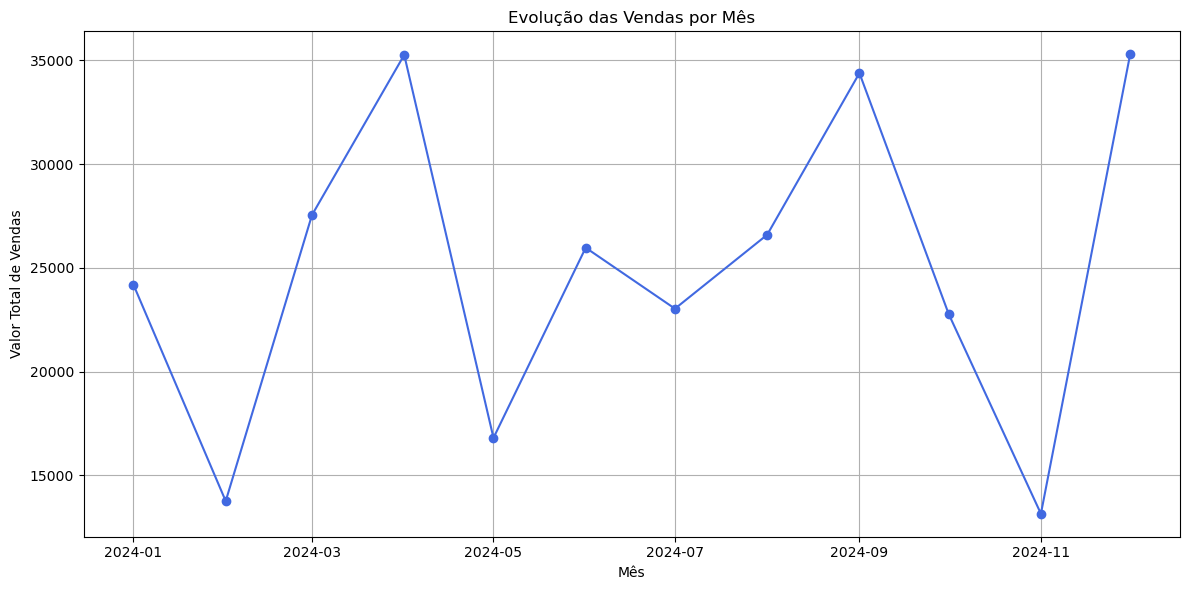

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Transformando a coluna "Data_Venda" em Datetime
vendas_relacao["Data_Venda"] = pd.to_datetime(vendas_relacao["Data_Venda"])

# Criando uma nova coluna que mostrará apenas MES e ANO, a partir da coluna existente Data_Venda
vendas_relacao["Ano_Mes"] = vendas_relacao["Data_Venda"].dt.to_period("M").astype(str)

# Nova variável para fazer uma filtragem GROUPBY de Ano_Mes, somando Valor_Venda 
evolucao_mensal = vendas_relacao.groupby("Ano_Mes")["Valor_Venda"].sum().reset_index()

#Transformando a nova coluna Ano_Mes em Datetime também
evolucao_mensal["Ano_Mes"] = pd.to_datetime(evolucao_mensal["Ano_Mes"])


#Plotando o gráfico utilizando essa coluna auxiliar Ano_Mes
plt.figure(figsize=(12, 6))
plt.plot(evolucao_mensal["Ano_Mes"], evolucao_mensal["Valor_Venda"], marker='o', linestyle='-', color='royalblue')

plt.title("Evolução das Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Valor Total de Vendas")
plt.grid(True)
plt.tight_layout()

plt.show()

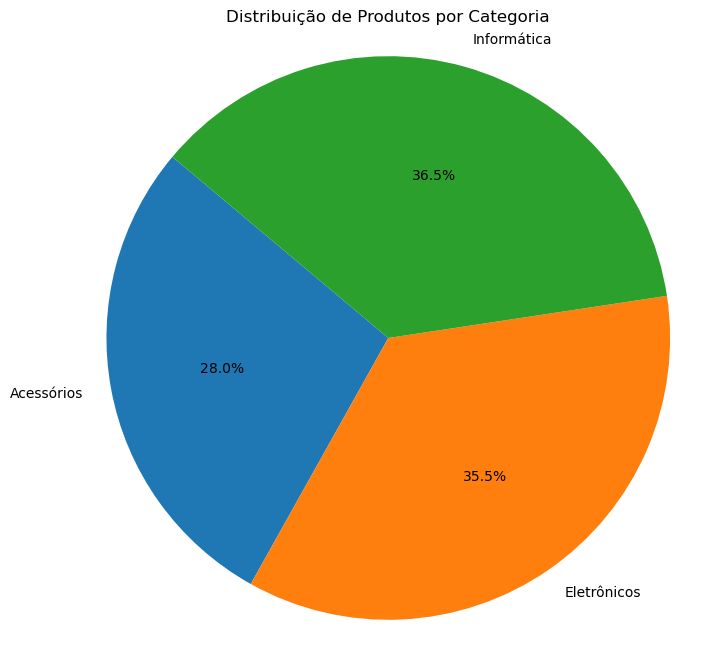

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
vendas_relacao = pd.read_csv("vendas_simuladas.csv");
categoria_destaque = vendas_relacao[["Produto", "Categoria"]].groupby("Categoria").count()
categoria_destaque.columns = ['Quantidade']
plt.figure(figsize=(8, 8))
plt.pie(categoria_destaque['Quantidade'], labels=categoria_destaque.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Produtos por Categoria')
plt.axis('equal')  # Garante que o gráfico será um círculo
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
vendas_relacao = pd.read_csv("vendas_simuladas.csv");
categoria_destaque = vendas_relacao[["Produto", "Categoria"]].groupby("Categoria").count()
total_vendas = vendas_relacao["Valor_Venda"].sum()
ticket_Acessorio = total_vendas / categoria_destaque
print(ticket_Acessorio)

                 Produto
Categoria               
Acessórios   5336.115893
Eletrônicos  4208.767465
Informática  4093.458767


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
vendas_relacao["Data_Venda"] = pd.to_datetime(vendas_relacao["Data_Venda"], errors='coerce')
vendas_relacao["AnoMes"] = vendas_relacao["Data_Venda"].dt.to_period("M")
vendas_mensais = vendas_relacao.groupby("AnoMes")["Quantidade"].sum().reset_index()
display(vendas_mensais)

,AnoMes,Quantidade
0,2024-01,37
1,2024-02,20
2,2024-03,40
3,2024-04,59
4,2024-05,28
5,2024-06,39
6,2024-07,38
7,2024-08,46
8,2024-09,51
9,2024-10,36


In [30]:
mes_mais_vendas = vendas_mensais.loc[vendas_mensais["Quantidade"].idxmax()]
print(f"Mês com mais vendas: {mes_mais_vendas['AnoMes']}, Quantidade: {mes_mais_vendas['Quantidade']}")

Mês com mais vendas: 2024-04, Quantidade: 59


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

############# PARTE 1 ##############

# Trazendo a visualização da tabela
vendas_relacao = pd.read_csv("vendas_simuladas.csv");
# Mostrando o agrupamento por Produto e somando suas quantidades

# Mostrando apenas os 3 produtos mais vendidos
tabela_agrupada = vendas_relacao[["Produto", "Quantidade"]].groupby("Produto").sum("Quantidade").nlargest(3, "Quantidade");
print(tabela_agrupada)

          Quantidade
Produto             
Monitor          146
Notebook         118
Tablet           106
